# 911 Calls

Projekt oparty jest na danych dostępnych na stronie [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Dane na stronie są aktualizowane o nowe rekordy, dlatego plik z którego korzystałem umieszczam [tutaj](https://drive.google.com/file/d/1HjDgCEbN6nEmeVckdOMW_61Cqo5hqWfb/view?usp=sharing).
Zawiera on informacje o połączeniach alarmowych (911 calls), w hrabstwie Montgomery w stanie Pennsylvania w USA.
911 to odpowiednik polskiego 112. Wybiera się go w nagłych przypadkach, gdy potrzebna jest pomoc policji, pogotowia ratunkowego lub straży pożarnej.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
calls = pd.read_csv('911.csv')
calls.head(1)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title            timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY  2015-12-10 17:10:52  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1

In [3]:
calls.loc[0]

lat                                                    40.2979
lng                                                   -75.5813
desc         REINDEER CT & DEAD END;  NEW HANOVER; Station ...
zip                                                      19525
title                                   EMS: BACK PAINS/INJURY
timeStamp                                  2015-12-10 17:10:52
twp                                                NEW HANOVER
addr                                    REINDEER CT & DEAD END
e                                                            1
Name: 0, dtype: object

Objaśnienia nazw kolumn:

* lat - latitude: szerokość geograficzna
* lng - longitude: długość geograficzna
* desc - description: opis wezwania
* zip - zipcode: kod pocztowy
* title: tytuł wezwania
* timeStamp - data i godzina
* twp - township: nazwa podziału administracyjnego w USA, odpowiednik gminy w Polsce
* addr: adres
* e: zmienna "manekin" (dummy), wszędzie wynosi 1.

In [4]:
calls.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639898 entries, 0 to 639897
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        639898 non-null  float64
 1   lng        639898 non-null  float64
 2   desc       639898 non-null  object 
 3   zip        562221 non-null  float64
 4   title      639898 non-null  object 
 5   timeStamp  639898 non-null  object 
 6   twp        639619 non-null  object 
 7   addr       639898 non-null  object 
 8   e          639898 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.9+ MB


Baza danych zawiera 639 898 wierszy. Warto zauważyć, że większość kolumn także posiada 639 898 wierszy. Wyjątkami są "zip", "addr" i "twp". Oznacza to, że w tych kolumnach występują braki danych. Najwyraźniej w niektórych przypadkach wezwania 911, nie odnotowuje się adresu, jednak współrzędne geograficzne podane są każdorazowo. Opis i tytuł także występują przy każdym zgłoszneiu. Nie ma więc potrzeby usuwania braków danych.

In [6]:
calls.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

Pierwszym krokiem jest uporządkowanie bazy danych.

In [7]:
type(calls['timeStamp'].iloc[0]) 

str

Kolumna "timeStamp" jest tekstem, należy zmienić jej typ.

In [8]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp']) 

In [9]:
type(calls['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Teraz możemy rozbić tę kolumnę na mniejsze części. Wydobywamy z niej rok, miesiąc, dzień tygodnia i godzinę.

In [10]:
calls['year'] = calls['timeStamp'].apply(lambda y: y.year)
calls['month'] = calls['timeStamp'].apply(lambda m: m.month)
calls['day of week'] = calls['timeStamp'].apply(lambda d: d.dayofweek)
calls['hour'] = calls['timeStamp'].apply(lambda h: h.hour)

calls.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  year  month  day of week  hour  
0      REINDEER CT & DEAD END  1  2015     12            3    17  
1  BRIAR PATH & WHITEMARSH LN  1  2015     12            3    17  
2                    HAWS AVE  1  2015     12            3    14  
3          AIRY ST & SWEDE ST  1  2015     12            3    16  
4    CHERRYWOOD CT & DEAD END  1  2015     12            3    16

In [11]:
calls['year'].unique() 

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Dane obejmują lata 2015-2020.

In [12]:
calls.drop('timeStamp', axis = 1, inplace = True)

In [13]:
calls['title'] 

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                     ...            
639893           Fire: GAS-ODOR/LEAK
639894    EMS: RESPIRATORY EMERGENCY
639895              Fire: FIRE ALARM
639896     EMS: UNRESPONSIVE SUBJECT
639897      Fire: FIRE INVESTIGATION
Name: title, Length: 639898, dtype: object

Kolumna "title" zawiera dwie informacje, ogólną przyczynę połączenia z 911 oraz jej doprecyzowanie. Analognicznie jak w poprzednim przypadku, umieszczę te informacje w odzielnych kolumnach.

In [14]:
calls['general reason'] = calls['title'].apply(lambda title: title.split(':')[0])
calls['detailed reason'] = calls['title'].apply(lambda title: title.split(':')[1])
calls.drop(labels = ['title', 'desc'], axis = 1, inplace = True)

In [15]:
calls.head()

lat        lng      zip                twp  \
0  40.297876 -75.581294  19525.0        NEW HANOVER   
1  40.258061 -75.264680  19446.0  HATFIELD TOWNSHIP   
2  40.121182 -75.351975  19401.0         NORRISTOWN   
3  40.116153 -75.343513  19401.0         NORRISTOWN   
4  40.251492 -75.603350      NaN   LOWER POTTSGROVE   

                         addr  e  year  month  day of week  hour  \
0      REINDEER CT & DEAD END  1  2015     12            3    17   
1  BRIAR PATH & WHITEMARSH LN  1  2015     12            3    17   
2                    HAWS AVE  1  2015     12            3    14   
3          AIRY ST & SWEDE ST  1  2015     12            3    16   
4    CHERRYWOOD CT & DEAD END  1  2015     12            3    16   

  general reason      detailed reason  
0            EMS    BACK PAINS/INJURY  
1            EMS   DIABETIC EMERGENCY  
2           Fire        GAS-ODOR/LEAK  
3            EMS    CARDIAC EMERGENCY  
4            EMS            DIZZINESS

Teraz, gdy nasza baza danych nie zawiera zbędnych i zagregowanych informacji, przyjrzyjmy się dokłdniej naszym danym. Na początek, sprawdźmy jakie są najczęstrze powody połączenia 911.

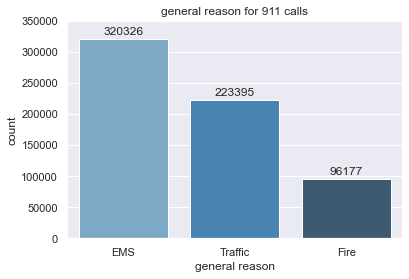

In [16]:
general_reason = calls['general reason'].value_counts()

sns.countplot(x = 'general reason', data = calls, palette = 'Blues_d', order = general_reason.index)
plt.title('general reason for 911 calls')
plt.ylim(0,350000)

for i in range(3):
    plt.text(i, general_reason[i]+7000, general_reason[i], fontname = 'Arial', fontsize = 12, ha = 'center')

Najczęściej wzywano EMS - Emergency Medical Services, czyli pogotowie ratunkowe. Drugą najczęstszą przyczyną wezwań 911 są zdarzeania drogowe, trzecią, najmniej liczną, pożary. Poniżej wypisane są unikatowe przyczyny wezwanie służb oraz wykresy najpopularniejszych z nich.

In [17]:
print(calls['detailed reason'][calls['general reason']== 'EMS'].unique())  
print(calls['detailed reason'][calls['general reason']== 'EMS'].nunique()) 

[' BACK PAINS/INJURY' ' DIABETIC EMERGENCY' ' CARDIAC EMERGENCY'
 ' DIZZINESS' ' HEAD INJURY' ' NAUSEA/VOMITING' ' RESPIRATORY EMERGENCY'
 ' SYNCOPAL EPISODE' ' VEHICLE ACCIDENT' ' GENERAL WEAKNESS'
 ' UNKNOWN MEDICAL EMERGENCY' ' UNRESPONSIVE SUBJECT'
 ' ALTERED MENTAL STATUS' ' CVA/STROKE' ' SUBJECT IN PAIN' ' HEMORRHAGING'
 ' FALL VICTIM' ' ASSAULT VICTIM' ' SEIZURES' ' MEDICAL ALERT ALARM'
 ' ABDOMINAL PAINS' ' OVERDOSE' ' MATERNITY' ' UNCONSCIOUS SUBJECT'
 ' CHOKING' ' LACERATIONS' ' FEVER' ' ALLERGIC REACTION' ' FRACTURE'
 ' BURN VICTIM' ' RESCUE - GENERAL' ' WARRANT SERVICE'
 ' EMS SPECIAL SERVICE' ' FIRE SPECIAL SERVICE' ' DEHYDRATION'
 ' CARBON MONOXIDE DETECTOR' ' BUILDING FIRE' ' APPLIANCE FIRE'
 ' SHOOTING' ' POISONING' ' RESCUE - TECHNICAL' ' EYE INJURY'
 ' ELECTROCUTION' ' STABBING' ' AMPUTATION' ' ANIMAL BITE' ' FIRE ALARM'
 ' VEHICLE FIRE' ' HAZARDOUS MATERIALS INCIDENT' ' RESCUE - ELEVATOR'
 ' FIRE INVESTIGATION' ' UNKNOWN TYPE FIRE' ' GAS-ODOR/LEAK'
 ' TRANSFERRED CAL

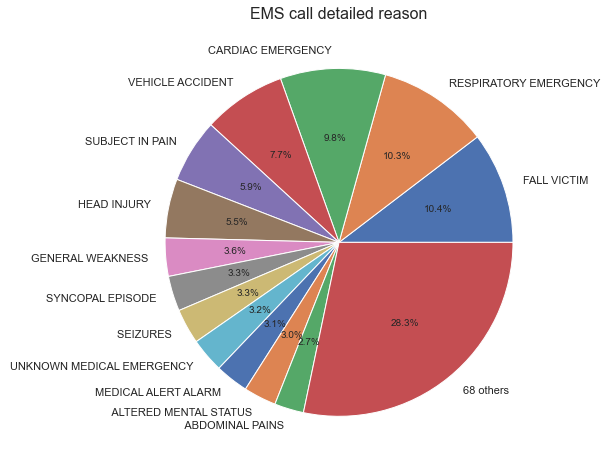

In [18]:
EMS = calls['detailed reason'][calls['general reason'] == 'EMS'].value_counts()
EMS_new = EMS[EMS >= 8500]
EMS_other_sum = EMS[EMS < 8500].values.sum()
other = pd.Series(EMS_other_sum, index = [' 68 others'])
EMS_new = EMS_new.append(other)

plt.figure(figsize = (8,8))
plt.title('EMS call detailed reason', fontsize = 16)
labels = EMS_new.index
values = EMS_new.values

plt.pie(x= values, labels = labels, autopct = '%.1f%%')

plt.show()

In [19]:
print( calls['detailed reason'][calls['general reason']== 'Traffic'].unique() )
print( calls['detailed reason'][calls['general reason']== 'Traffic'].nunique() )

[' VEHICLE ACCIDENT -' ' DISABLED VEHICLE -' ' ROAD OBSTRUCTION -'
 ' DEBRIS/FLUIDS ON HIGHWAY -' ' VEHICLE LEAKING FUEL -' ' VEHICLE FIRE -'
 ' HAZARDOUS ROAD CONDITIONS -']
7


<ipython-input-20-377e7dcb925d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation = 45, ha = 'right')
<ipython-input-20-377e7dcb925d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation = 45, ha = 'right')


Text(0.5, 1.0, 'zoom')

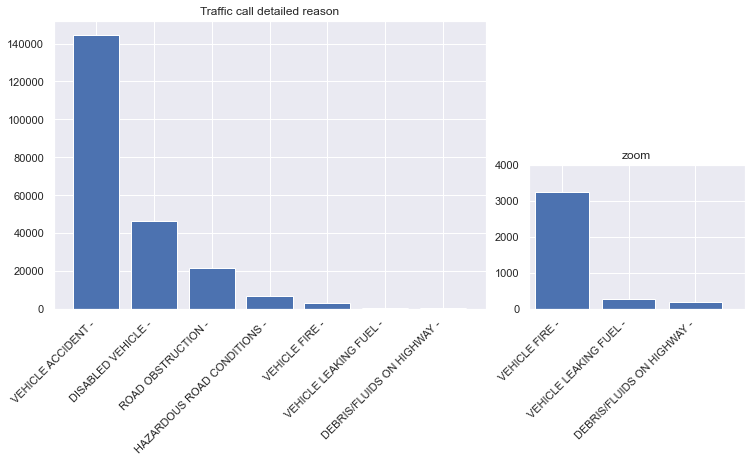

In [20]:
Traffic = calls['detailed reason'][calls['general reason']== 'Traffic'].value_counts()
values = Traffic.values
labels = Traffic.index

fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax1.bar(labels, values )
ax1.set_xticklabels(labels, rotation = 45, ha = 'right')
ax1.set_title('Traffic call detailed reason')

ax2 = fig.add_axes([1.1,0,0.5,0.5])
ax2.bar(labels, values )
ax2.set_xticklabels(labels, rotation = 45, ha = 'right')
ax2.set_xlim(3.5,None)
ax2.set_ylim(None, 4000)
ax2.set_title('zoom')

In [21]:
print( calls['detailed reason'][calls['general reason']== 'Fire'].unique() )
print( calls['detailed reason'][calls['general reason']== 'Fire'].nunique() )

[' GAS-ODOR/LEAK' ' APPLIANCE FIRE' ' CARBON MONOXIDE DETECTOR'
 ' VEHICLE ACCIDENT' ' FIRE ALARM' ' PUMP DETAIL' ' FIRE INVESTIGATION'
 ' TRASH/DUMPSTER FIRE' ' UNKNOWN TYPE FIRE' ' BUILDING FIRE'
 ' ELECTRICAL FIRE OUTSIDE' ' DEBRIS/FLUIDS ON HIGHWAY' ' BURN VICTIM'
 ' RESCUE - GENERAL' ' WOODS/FIELD FIRE' ' FIRE SPECIAL SERVICE'
 ' VEHICLE FIRE' ' S/B AT HELICOPTER LANDING' ' RESCUE - ELEVATOR'
 ' TRANSFERRED CALL' ' RESCUE - TECHNICAL' ' VEHICLE LEAKING FUEL'
 ' FIRE POLICE NEEDED' ' MEDICAL ALERT ALARM' ' TRAIN CRASH'
 ' HAZARDOUS MATERIALS INCIDENT' ' UNKNOWN MEDICAL EMERGENCY'
 ' RESCUE - WATER' ' PLANE CRASH' ' CARDIAC ARREST' ' EMS SPECIAL SERVICE'
 ' UNCONSCIOUS SUBJECT' ' POLICE INFORMATION' ' DIABETIC EMERGENCY'
 ' SYNCOPAL EPISODE' ' FALL VICTIM' ' CARDIAC EMERGENCY'
 ' UNRESPONSIVE SUBJECT' ' DISABLED VEHICLE' ' ANIMAL COMPLAINT'
 ' STANDBY FOR ANOTHER CO' ' PRISONER IN CUSTODY' ' SUSPICIOUS'
 ' SUBJECT IN PAIN' ' RESPIRATORY EMERGENCY' ' SUICIDE ATTEMPT'
 ' NAUSEA/VOMITI

Text(0.5, 1.0, 'Fire call reason')

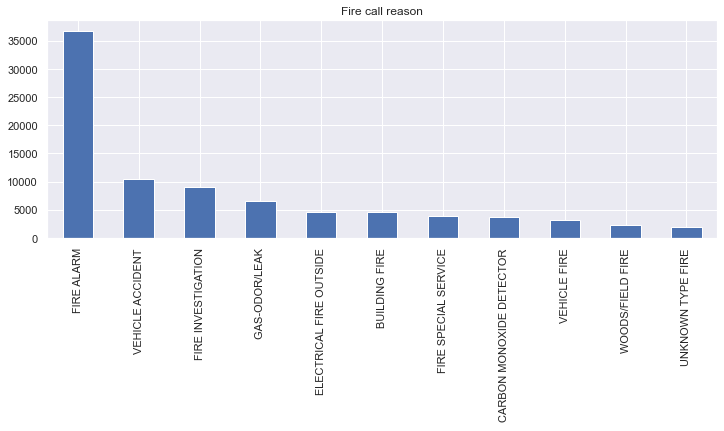

In [22]:
plt.figure(figsize=(12,4))
calls['detailed reason'][calls['general reason']== 'Fire'].value_counts().plot(kind = 'bar')
plt.xlim(None, 10.5)
plt.title ('Fire call reason')

Przyjrzyjmy się jak kształtowały się dane na przstrzeni lat

In [23]:
arr = calls['year'].unique()
year = []
for i in arr:
    year.append(calls[calls['year'] == i]['e'].count())

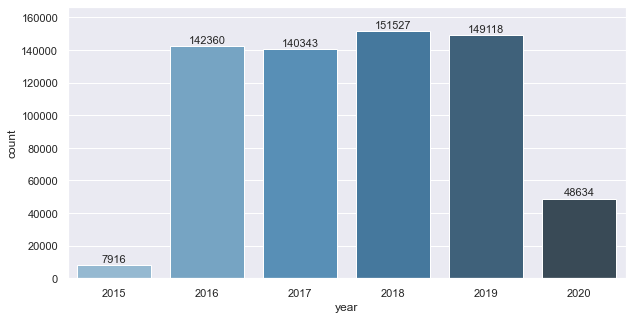

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'year', data = calls, palette = 'Blues_d')
plt.ylim(None, max(year)*1.1)
for i in range(6):
    plt.text(i, year[i]+2000, year[i], fontname = 'Arial', fontsize = 11, ha = 'center')

In [25]:
for i in arr:
    print(i, calls['month'][calls['year'] == i].unique())

2015 [12]
2016 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2017 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2018 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2019 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2020 [1 2 3 4 5]


Widać, że lata 2015 i 2020 nie są kompletne. W 2015 roku posiadamy obserwacje tylko z grudnia, a w 2020 do od stycznia do maja.
Natomiast lata 2016 - 2019 zawierają dane z wszystkich 12 miesięcy

In [26]:
calls2 = calls[calls['year'].isin(arr[1:5])]

<AxesSubplot:xlabel='year', ylabel='count'>

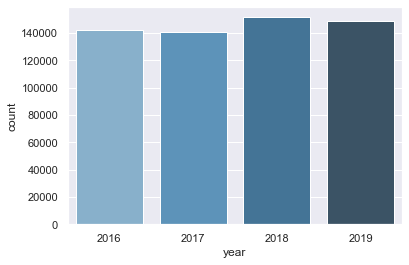

In [27]:
sns.countplot(x = 'year', data = calls2, palette = 'Blues_d')

Dzięki tej operacji wyniki ilościowe w poszczególnych miesiącach będą wiarygodne. Możemy przygotować teraz ilościowy wykres wezwania 911 dla każdego z miesięcy. Oto kilka przykładowych wykresów jakie można sporządzić na podstawie posiadanych danych

Text(0.5, 1.0, '911 calls by month, 2016-2019')

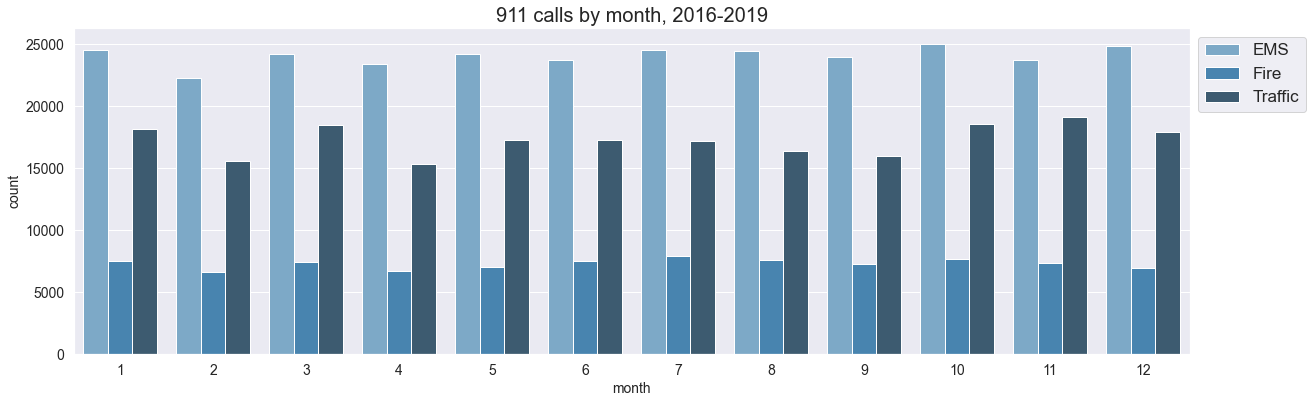

In [28]:
plt.figure(figsize = (20,6))

sns.countplot(x = 'month', data = calls2, hue = 'general reason', palette = 'Blues_d')
plt.legend(bbox_to_anchor = (1,1), prop = {'size': 17})

plt.xticks(fontsize = 14)
plt.xlabel('month', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.title('911 calls by month, 2016-2019', fontsize = 20)

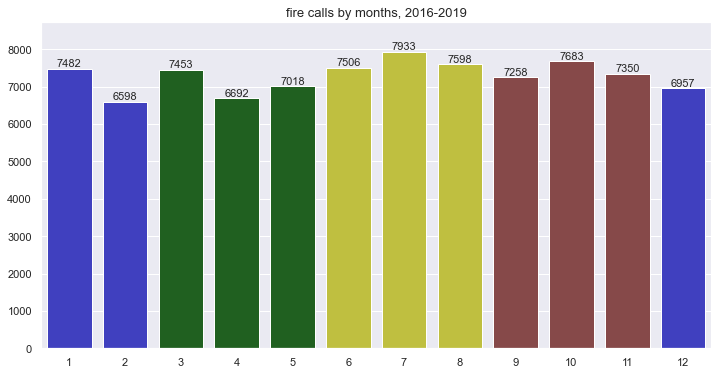

In [29]:
colors = {1:'blue', 2:'blue', 3:'green',
          4:'green', 5:'green', 6:'yellow',
          7:'yellow', 8:'yellow', 9:'brown',
          10:'brown', 11:'brown', 12:'blue'}

Fire = calls2['month'][calls2['general reason'] == 'Fire'].value_counts()
Fire.sort_index(inplace = True)

values = Fire.values
labels = Fire.index

plt.figure(figsize = (12,6))
sns.barplot(x = labels, y = values, palette = colors, saturation=0.5)
plt.title('fire calls by months, 2016-2019', fontsize = 13)
plt.ylim(None, max(values)*1.1)
for i in range(12):
    plt.text(i, values[i]+50, values[i], fontname = 'Arial', fontsize = 11, ha = 'center')

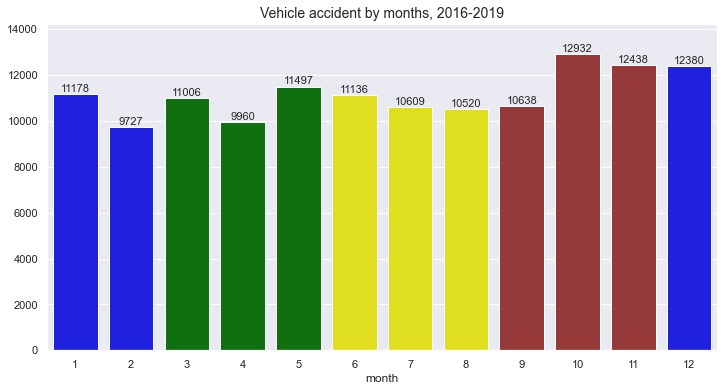

In [30]:
Vehicle_accident = calls2['month'][calls2['detailed reason'] == ' VEHICLE ACCIDENT -'].value_counts()
Vehicle_accident.sort_index(inplace = True)

values = Vehicle_accident.values
labels = Vehicle_accident.index

plt.figure(figsize = (12,6))
sns.barplot(x = labels, y = values, palette = colors)

plt.title('Vehicle accident by months, 2016-2019', fontsize = 14)
plt.ylim(None, max(values)*1.1)
plt.xlabel('month')

for i in range(12):
    plt.text(i, values[i]+100, values[i], fontname = 'Arial', fontsize = 11, ha = 'center')

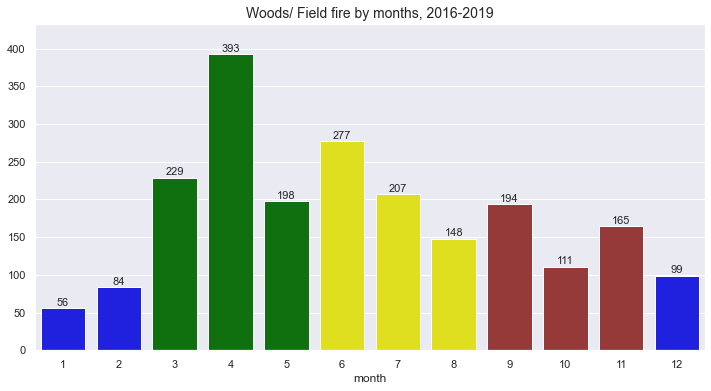

In [31]:
Wood_fire = calls2['month'][calls2['detailed reason'] == ' WOODS/FIELD FIRE'].value_counts()
Wood_fire.sort_index(inplace = True)
values = Wood_fire.values
labels = Wood_fire.index

plt.figure(figsize = (12,6))
sns.barplot(x = labels, y = values, palette = colors )

plt.title('Woods/ Field fire by months, 2016-2019', fontsize = 14)
plt.xlabel('month')
plt.ylim(None, max(values)*1.1)

for i in range(12):
    plt.text(i, values[i]+3, values[i], fontname = 'Arial', fontsize = 11, ha = 'center')

Sprawdzmy teraz w jakie dni tygodnia i w jakich godzinach odnotowuje się najwięcej zgłoszeń. W tym celu sporządzę mapę ciepła.

In [32]:
dh = calls.groupby(by = ['hour', 'day of week']).count()['general reason'].unstack()

In [33]:
dh.head()

day of week     0     1     2     3     4     5     6
hour                                                 
0            1826  1654  1599  1648  1913  2350  2345
1            1507  1407  1425  1353  1570  1982  2075
2            1316  1278  1210  1357  1396  1831  1881
3            1230  1169  1214  1187  1256  1540  1565
4            1296  1207  1078  1217  1283  1392  1421

Text(0.5, 1.0, 'heamap, 911 calls')

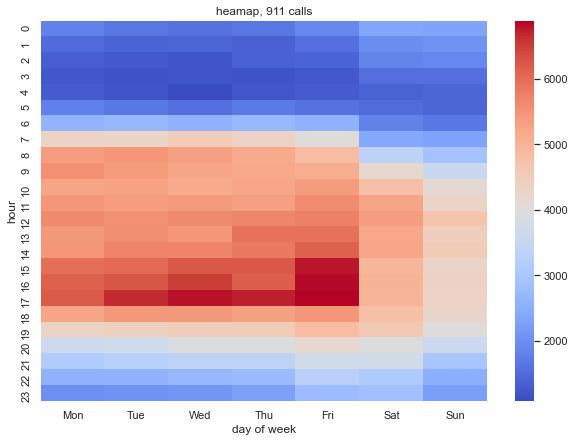

In [34]:
plt.figure(figsize = (10,7))
sns.heatmap(dh, cmap = 'coolwarm', 
            xticklabels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("heamap, 911 calls")

Zauważyć moża wiele zależności.
1. W dni powszednie odnotowuje się wiecej połączeń alarmowych niż w soboty i niedziele. Można to wytłumaczyć na przykład wzmożonym ruchem drogowym związanym z pracą.
2. Najwięcej połączeń odnotowuje się w godzinach 15 - 17, czyli w godzinach w których zazwyczaj kończy się pracę i ruch jest największy
3. Najniebzepieczniejszym okresem są piątki w godzinach między 15 - 17. Pamiętajmy żeby nie myśleć o weekendzie za wcześnie ;)
4. W dni powszednie najmniej zgłoszeń odnotowuje się między 24 a 5, a w weekendy między 3 a 7.  
5. W godzinach wieczornych w piątki i soboty odnotowuje się więcej zgłoszeń niż o tej samej porze w pozostałych dniach tygodnia. Wniosek: trzeba uważać po spożyciu alkoholu ;) 
6. Niedziela jest zdecydowania najspokojniejszym dniem w tygodniu.

In [35]:
calls_corona = calls[(calls['year'] == 2020) & (calls['month'].isin(np.arange(3,6)))]

In [36]:
dhc = calls_corona.groupby(by = ['hour', 'day of week']).count()['general reason'].unstack()

Text(0.5, 1.0, 'heatmap, 911 calls in COVID-19 pandemy')

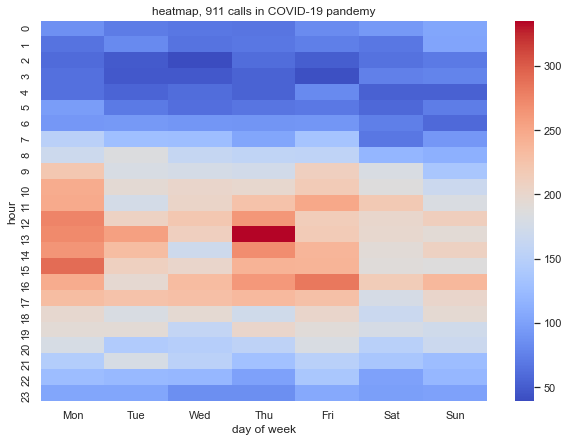

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(dhc, cmap = 'coolwarm', 
            xticklabels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("heatmap, 911 calls in COVID-19 pandemy")

Ta mapa ciepła obrazuje rozkład połączeń alarmowych w czasie panedmii koronawirusa (marzec - maj 2020 rok). O ile z poprzedniej mapy można było wyciągnąć wiele winiosków, o tyle ta wydaje się bardzo chaotyczna. Nie widać wyraźnych zależności między dniami tygodnia. Wydaje mi się, że chwilowe zwiększenia przypadków są bardziej kwestią przypadku. Można dostrzec podobieństwo w godzinowym rozkładzie połączeń. Nadal godziny wczesno poranne i nocne są spokojniejsze od południowych i popołudniowych. Różnice są jednak bardziej subtelne. Warto odnotować także różnicę w skali. Mapa druga ma o wiele krótszy okres więc i liczba zgłoszeń jest mniejsza. 

Teraz użyje współrzędnych geograficznych. Każdy z wpisów ma określoną długość i szerokość geograficzną. Można więc wykorzystać rozszerzenie gmaps, działające na podstawie google maps, przypisując każdemu puntkowi jego położenie na mapie. Z powodów optymalizacyjnych, kod tworzący mapy zrobiony jest w innym notebooku. Tu wklejone będą wyniki zapisane w formie zdjęć.

Drobna uwaga, wyniki z gmaps opatrzone są znakiem wodnym "For development purposes only". Biznesowe zastosowanie gmaps jest odpłatne. Ja korzystam z nich w celach rozwojowych, dlatego pozostawiam je w taki stanie.

In [38]:
def mapa(nazwa):
    image = Image.open('zdj/' + nazwa)
    return(image)

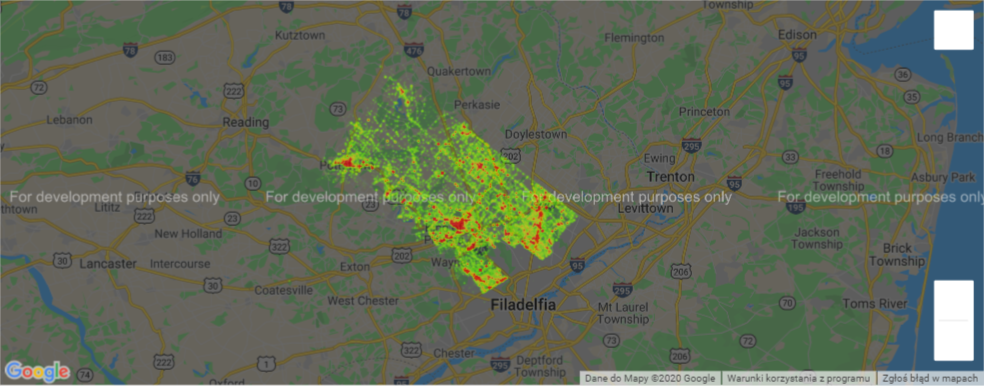

In [39]:
mapa('mapa cala.png')

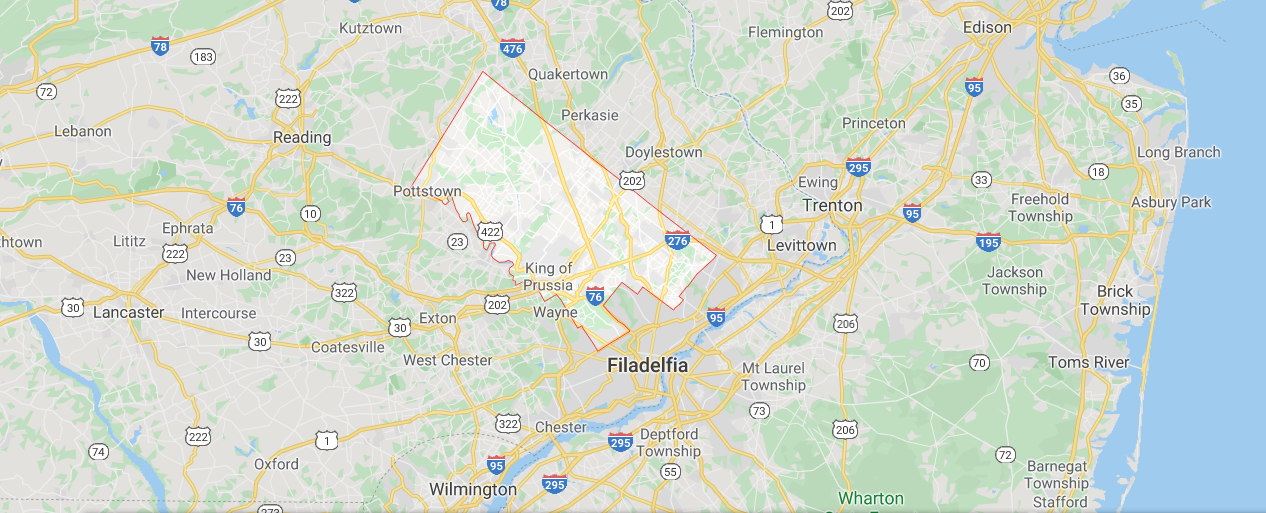

In [40]:
mapa('mapa hrabstwo.png')

Posiadane przez nas dane wyraźnie zarysowują granice hrabstwa Montgomery. Na mapie można dostrzec 3 największe skupiska, w których dochodziło do interwencji służb publicznych. W miejscowości Pottstown (zachód), w miejscowości King of Prussia (południe), i przy południowo-wschodzniej granicy hrabstwa przy drodze 276.  

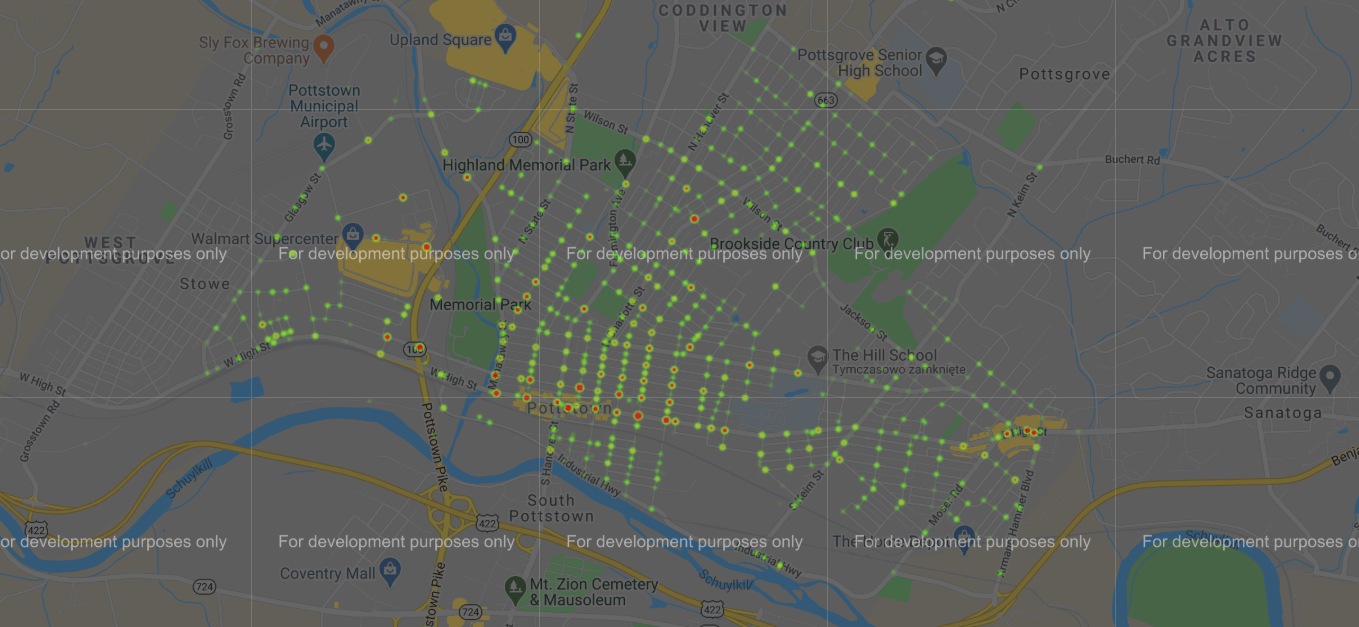

In [41]:
mapa('pottstown.png')

Ta mapa zawiera wyselekcjonowane dane wyłącznie z miejscowości Pottstown. Z danych wynika, że najbardziej niebezpieczną ulicą w miasteczku jest W High St. Widać na niej zagęszczenie czerwonych kropek. Zauważyć też można, że kropki znajdują się skrzyżowaniach ulic. Wynika to zapewne z faktu, że amerykańskie drogi są dobrze uporządkowane. Podając lokajizację, często podaje się nazwy dwóch krzyżujących się w tym miejscu ulic. Zapewne więc szerokości i długości geograficzne są w ten sposób uproszczone. Nie podaje się dokładnego miejsca zdarzenia, ale lokalizacje najbliższego skrzyżowania dróg

In [42]:
calls_group = calls.groupby(['lat','lng'],as_index=False).count()
calls_group = calls_group.sort_values(by = 'general reason' ,ascending=False)
calls_group[['lat','lng','general reason']].head(10)

lat        lng  general reason
6032   40.097222 -75.376195            9037
10288  40.133037 -75.408463            6992
18456  40.229008 -75.387853            5556
1902   40.024967 -75.282905            5289
7299   40.108267 -75.306233            3040
14389  40.172314 -75.492728            3029
3353   40.069832 -75.316295            2820
12620  40.153268 -75.189558            2770
23089  40.289027 -75.399590            2528
4354   40.081260 -75.137025            2327

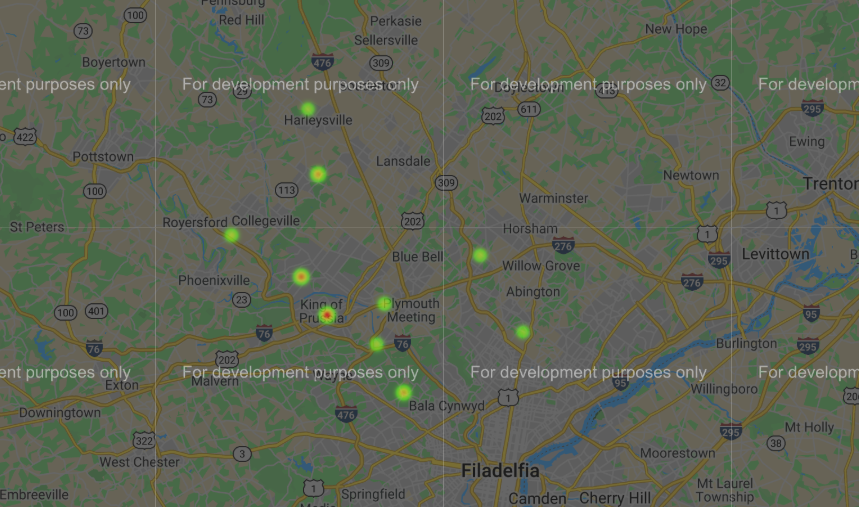

In [43]:
mapa('top 10.png')

Ta mapa przedstawia 10 miejsc w hrabstwie Montgomery, w których najczęściej interweniowały służby publiczne w badanym okresie (od grudnia 2015 do maja 2020), według współrzędnych geograficznych. Najbardziej wyróżnia się punkt w mieście King of Prussia, w którym było ich aż 9037. 

In [44]:
a = calls_group.iloc[0][['lat','lng']]
a # współrzęde największego punktu

lat    40.097222
lng   -75.376195
Name: 6032, dtype: float64

In [45]:
point = calls[(calls['lat'] == a['lat']) & (calls['lng'] == a['lng'])]
point.head()

lat        lng  zip           twp  \
14   40.097222 -75.376195  NaN  UPPER MERION   
28   40.097222 -75.376195  NaN  UPPER MERION   
30   40.097222 -75.376195  NaN  UPPER MERION   
323  40.097222 -75.376195  NaN  UPPER MERION   
379  40.097222 -75.376195  NaN  UPPER MERION   

                                      addr  e  year  month  day of week  hour  \
14   SCHUYLKILL EXPY & CROTON RD UNDERPASS  1  2015     12            3    17   
28   SCHUYLKILL EXPY & WEADLEY RD OVERPASS  1  2015     12            3    18   
30   SCHUYLKILL EXPY & WEADLEY RD OVERPASS  1  2015     12            3    18   
323          SCHUYLKILL EXPY & RR OVERPASS  1  2015     12            4    15   
379       SCHUYLKILL EXPY & RT202 OVERPASS  1  2015     12            4    17   

    general reason      detailed reason  
14         Traffic   VEHICLE ACCIDENT -  
28         Traffic   VEHICLE ACCIDENT -  
30         Traffic   VEHICLE ACCIDENT -  
323        Traffic   VEHICLE ACCIDENT -  
379        Traffic   DISABLED VEHICLE -

<AxesSubplot:xlabel='general reason', ylabel='count'>

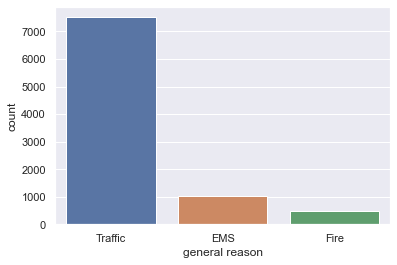

In [46]:
sns.countplot(x = point['general reason'], data = point)

(-0.5, 4.5)

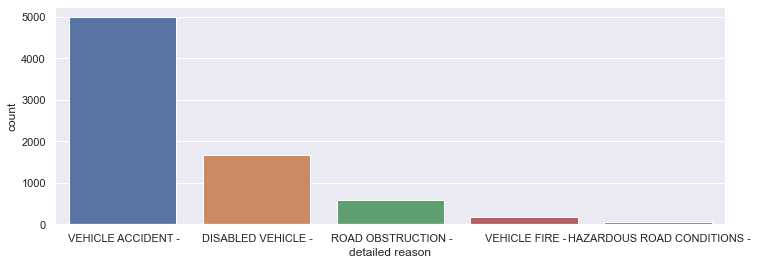

In [47]:
plt.figure(figsize = (12,4))
sns.countplot(x = point['detailed reason'][point['general reason'] == 'Traffic'], data = point)
plt.xlim(None, 4.5)

Większość zdarzeń w tym punkcie jest związanych z ruchem drogowym

<AxesSubplot:xlabel='year', ylabel='count'>

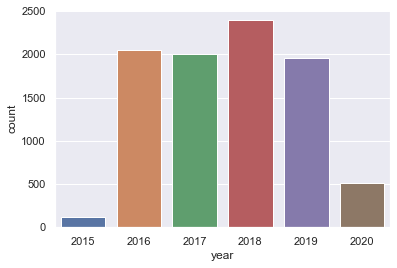

In [48]:
sns.countplot(x = point['year'], data = point)

Wypadki w tym miejscu powtarzają się każdego roku

In [49]:
point['addr'].nunique()

252

In [50]:
weadley = point['lat'][point['addr'] == 'SCHUYLKILL EXPY & WEADLEY RD OVERPASS'].count()
weadley

1287

In [51]:
print(weadley/(12*4+6)) # 12 miesięcy z lat 2016-2019, + 5 miesięcy z 2020 i 1 miesiąc z 2015
print(weadley/4.5) # 4 i pół roku

23.833333333333332
286.0


Co ciekawe pod tymi samymi współrzędymi (40.097222, -75.376195) pojawiają się różne adresy. Jest ich aż 252. Gdy poszuka się tych adresów na mapie przekonamy sie, że występują niezgodności. Przykładowo, najczęściej występującym adresem jest "SCHUYLKILL EXPY & CROTON RD UNDERPASS". Doszło w nim do około 1287 interwencji służb publicznych. Co daje średnio 23.83 interwencje w miesiącu lub 286 w ciągu roku. Dane są zapewne nieco zawyżone, gdyż zdarza się, że w jednym zdarzeniu drogowym (Traffic) uczestniczy straż pożarana (Fire), medycy (EMS) i policja. Jednak wciąż jest to bardzo niebezpieczne miejsce. [Link do miejsca w Google Street Viev](https://www.google.com/maps/@40.0761457,-75.360938,3a,81.6y,216.5h,71.43t/data=!3m6!1e1!3m4!1sl558tpsak1ikEnFA5wXyiA!2e0!7i16384!8i8192). Trzeba przyznać, że wiadukt ma czasy świetności za sobą, a władze miasta patrząc w takie dane, powinny wyciągnąć wnioski i zwiększyć bezpieczeństwo tego punktu.

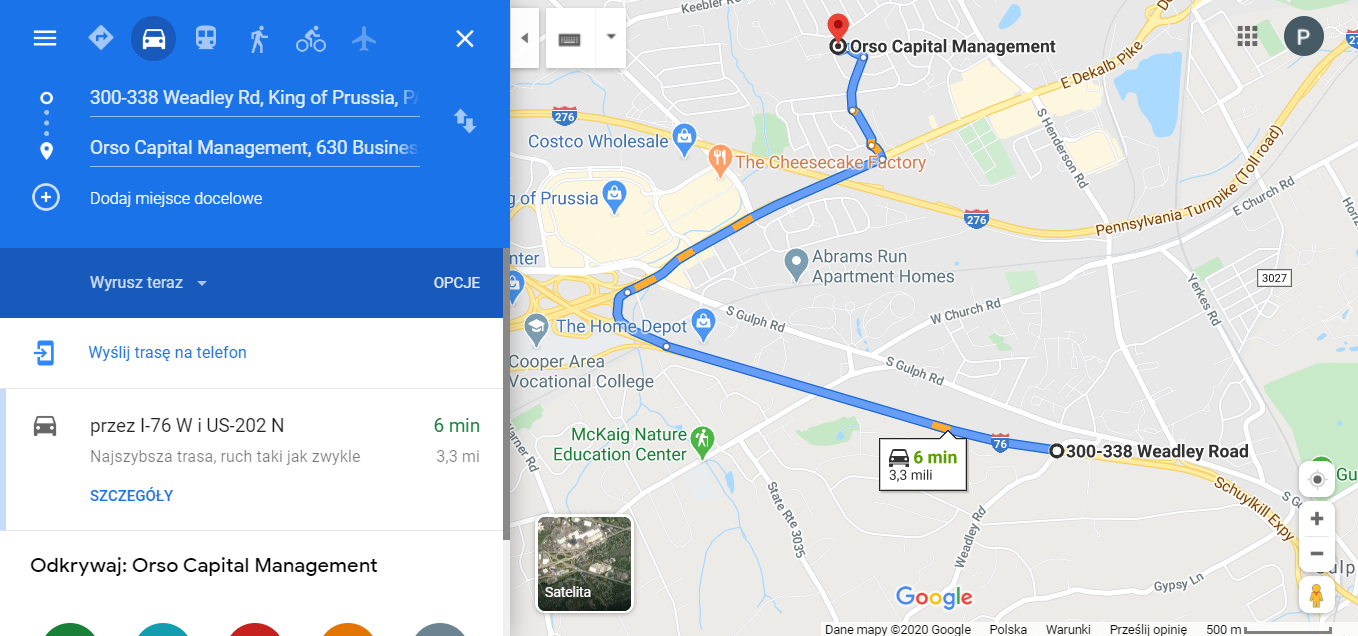

In [52]:
mapa('wadley rd.png')

Zdjęcie jest potwierdzeniem nieścisłości jakie występują w bazie. Taki dystans dzieli punkt o współrzędnych 40.097222, -75.376195 a miejscem wpisanym w adresie. Uważam, że te błędy wynikają z zaniedbań osób sporządzająch bazę. Prawdopodobnie osoba, której nie chciało się szukać dokładnej geolokalizacji punktu, wklejała te które miała pod ręką. 

In [53]:
b = calls_group.iloc[1][['lat','lng']]
b #współrzędne drugiego największego punktu

lat    40.133037
lng   -75.408463
Name: 10288, dtype: float64

In [54]:
point2 = calls[(calls['lat'] == b['lat']) & (calls['lng'] == b['lng'] )]
point2.head()

lat        lng      zip               twp  \
25   40.133037 -75.408463  19403.0  LOWER PROVIDENCE   
55   40.133037 -75.408463  19403.0  LOWER PROVIDENCE   
68   40.133037 -75.408463  19403.0  LOWER PROVIDENCE   
105  40.133037 -75.408463  19403.0  LOWER PROVIDENCE   
157  40.133037 -75.408463  19403.0  LOWER PROVIDENCE   

                                  addr  e  year  month  day of week  hour  \
25   SHANNONDELL DR & SHANNONDELL BLVD  1  2015     12            3    18   
55   SHANNONDELL DR & SHANNONDELL BLVD  1  2015     12            3    19   
68   SHANNONDELL DR & SHANNONDELL BLVD  1  2015     12            3    19   
105  SHANNONDELL DR & SHANNONDELL BLVD  1  2015     12            3    22   
157  SHANNONDELL DR & SHANNONDELL BLVD  1  2015     12            4     7   

    general reason    detailed reason  
25             EMS   GENERAL WEAKNESS  
55             EMS         CVA/STROKE  
68             EMS    SUBJECT IN PAIN  
105            EMS    ABDOMINAL PAINS  
157            EMS        FALL VICTIM

<AxesSubplot:xlabel='general reason', ylabel='count'>

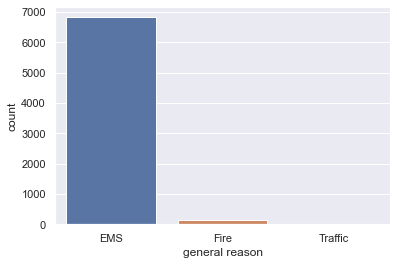

In [55]:
sns.countplot(x = point2['general reason'], data = point2)

In [56]:
point2['addr'].unique()

array(['SHANNONDELL DR & SHANNONDELL BLVD'], dtype=object)

W tym punkcie współrzędne goegraficzne zgadzają się z podanym adresem. Jest to zarazem jedyny adres występujący w tej tabeli. Możemy więc założyć że dane są wolne od błędów, które pojawiły się poprzednio. Co ciekawe, prawie wszystkie przypadki dotyczyła wezwania służb medycznych. Po wyszukaniu miejsca w Google Maps, dowiemy się, że pod tym adresem mieści się dużych rozmiwarów [Dom Seniora.](https://www.google.com/maps/place/Shannondell+Dr+%26+Shannondell+Blvd,+Audubon,+PA+19403,+Stany+Zjednoczone/@40.135739,-75.4153908,563m/data=!3m1!1e3!4m5!3m4!1s0x89c696c18b0bb301:0x39bc9a1208784c9b!8m2!3d40.1368596!4d-75.4127427) Ten fakt wyjaśniałby, dlaczego interwencje medyków są tutaj tak częste.

In [57]:
adres = calls.groupby('addr',as_index=False).count()[['addr', 'general reason']]
adres = adres.sort_values(by = 'general reason',ascending = False ).head(10)
adres

addr  general reason
32731      SHANNONDELL DR & SHANNONDELL BLVD            6992
20913          MAIN ST & OLD SUMNEYTOWN PIKE            2456
35515                THE FAIRWAY  & RYDAL RD            1932
10640          EAGLEVILLE RD & SUNDERLAND DR            1561
11597           EVERGREEN RD & W LIGHTCAP RD            1541
13381           GERMANTOWN PIKE & HANNAH AVE            1501
14578                    GULPH RD & KIRK AVE            1410
3292             BLACK ROCK RD & S TRAPPE RD            1375
8684            DAVISVILLE RD & PENNYPACK RD            1323
32400  SCHUYLKILL EXPY & WEADLEY RD OVERPASS            1287

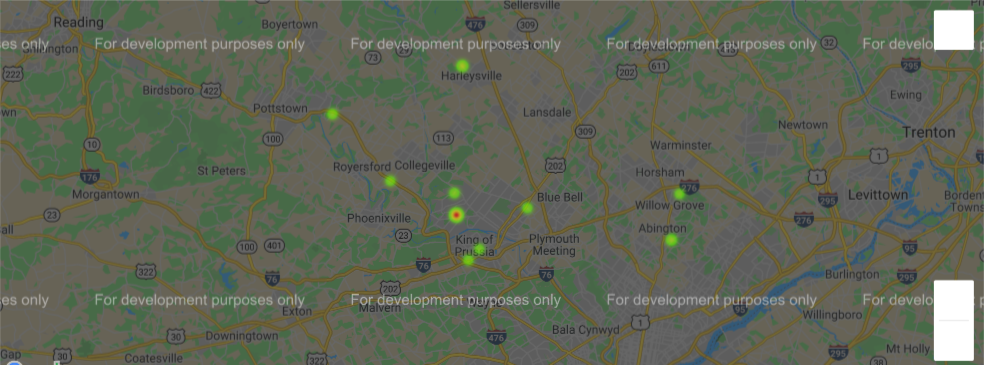

In [58]:
mapa('addr.png')

Lista i mapa 10 miejsc w których najczęściej odnotowano połączenia alarmowe według adresu. Analizowany już wcześniej Dom Seniora okazuje się więc miejscem najczęstrzych interwencji. Wspominany także wiadukt przy SCHUYLKILL EXPY & WEADLEY RD znajduje się na 10 miejscu. Te zestawienie jest bardziej wiarygodne, ponieważ jak się okazało, podane współrzędne nie zawsze są prawidłowe.

Dziękuje za przejrzenie mojej pracy. Uważam, że analiza wskazała kilka prawdziwych problemów, które mogą pomóc w zwiększeniu bezpieczeństwa w danym regionie. Możliwości jakie daje analiza danych w Pythonie jest są ogrmone. Z suchych danych można wyciągnąć na prawdę ciekawe wnioski. Moim zdaniem, to jest właśnie najbardziej fascynujące. Z pewnością analizowane dane skrywają jeszcze wiele sekretów, które dałoby się odkryć.